# 1. Import neccesary Libraries

In [1]:
# Math Libraries
import numpy as np
import pandas as pd

# One Sample and Two Sample Tests Library
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.proportion import proportions_ztest

# Library for Test of Proportion and ANOVA
import statsmodels.api as sm
from   statsmodels.formula.api import ols

# Visualization Libraries from Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ImportError: cannot import name 'factorial' from 'scipy.misc' (C:\Users\Soumendra\Anaconda3\lib\site-packages\scipy\misc\__init__.py)

# 2. Read the data as a data frame

In [ ]:
insurance_data = pd.read_csv('insurance.csv')
insurance_data.head()

# 3(a). Check the Shape of the Data

In [ ]:
# Will be used later to decide bin size in histograms
insurance_data.shape

# 3(b). Datatype of each Attribute

In [4]:
insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# 3(c). Check presence of missing value


In [5]:
#Check for any NULL Value

insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# 3(d). 5 point summary of numerical attributes

In [6]:
# 5-Point Summary : Median, 1st Quartile, 3rd Quartile, Minimum, Maximum can be acheived via Boxplot


Age Median : 39.0
Age 1st Quartile : 27.0
Age 3rd Quartile : 51.0
Age Minimum Value : 18
Age Maximum Value : 64 



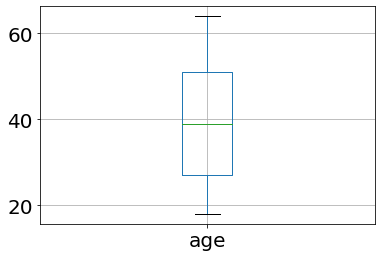

In [7]:
age_plot = insurance_data.boxplot(column = "age", fontsize= 20)

age_quartile = np.percentile(insurance_data["age"], [50, 25, 75])
print("Age Median :", age_quartile[0])
print("Age 1st Quartile :", age_quartile[1])
print("Age 3rd Quartile :", age_quartile[2])
print("Age Minimum Value :", insurance_data['age'].min())
print("Age Maximum Value :", insurance_data['age'].max(),"\n")

BMI Median : 30.4
BMI 1st Quartile : 26.29625
BMI 3rd Quartile : 34.69375
BMI Minimum Value : 15.96
BMI Maximum Value : 53.13 



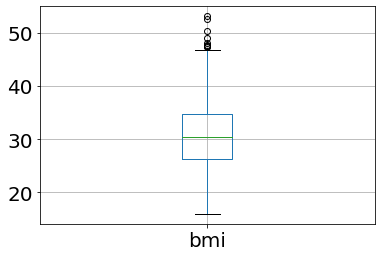

In [8]:
bmi_plot = insurance_data.boxplot("bmi", fontsize= 20)

bmi_quartile = np.percentile(insurance_data['bmi'], [50,25,75])
print("BMI Median :", bmi_quartile[0])
print("BMI 1st Quartile :", bmi_quartile[1])
print("BMI 3rd Quartile :", bmi_quartile[2])
print("BMI Minimum Value :", insurance_data['bmi'].min())
print("BMI Maximum Value :", insurance_data['bmi'].max(), "\n")

children Median : 1.0
children 1st Quartile : 0.0
children 3rd Quartile : 2.0
children Minimum Value : 0
children Maximum Value : 5 



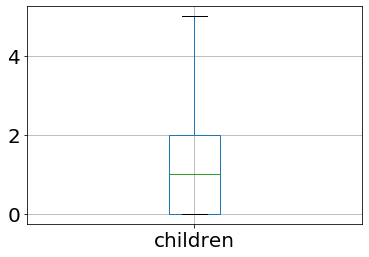

In [9]:
children_plot = insurance_data.boxplot("children", fontsize= 20)

children_quartile = np.percentile(insurance_data['children'], [50,25,75])
print("children Median :", children_quartile[0])
print("children 1st Quartile :",children_quartile[1])
print("children 3rd Quartile :", children_quartile[2])
print("children Minimum Value :", insurance_data['children'].min())
print("children Maximum Value :", insurance_data['children'].max(), "\n")

charges Median : 9382.033
charges 1st Quartile : 4740.28715
charges 3rd Quartile : 16639.912515
charges Minimum Value : 1121.8739
charges Maximum Value : 63770.42801 



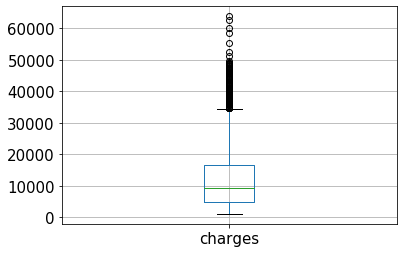

In [10]:
charges_plot = insurance_data.boxplot("charges", fontsize= 15)

charges_quartile = np.percentile(insurance_data['charges'], [50,25,75])
print("charges Median :", charges_quartile[0])
print("charges 1st Quartile :",charges_quartile[1])
print("charges 3rd Quartile :", charges_quartile[2])
print("charges Minimum Value :", insurance_data['charges'].min())
print("charges Maximum Value :", insurance_data['charges'].max(), "\n")

# 3(e). Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

Text(0.5, 0, '<---- BMI ---->')

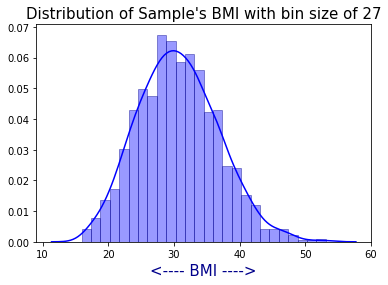

In [11]:
sns.distplot(insurance_data["bmi"], hist=True, kde=True, 
             bins = int(1338/50), color = 'blue',
             hist_kws={'edgecolor':'darkblue'})

plt.title("Distribution of Sample's BMI with bin size of 27", fontsize = 15)
plt.xlabel("<---- BMI ---->", fontsize = 15, color = "darkblue")

Text(0.5, 0, '<---- AGE ---->')

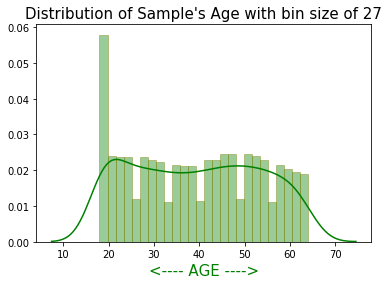

In [12]:
sns.distplot(insurance_data["age"], hist = True, kde = True, 
            bins = int(1338/50), color = "green", 
            hist_kws= {'edgecolor' :'olive'})

plt.title("Distribution of Sample's Age with bin size of 27", fontsize= 15)
plt.xlabel("<---- AGE ---->", fontsize = 15, color = "green")

Text(0.5, 0, '<---- CHARGES ---->')

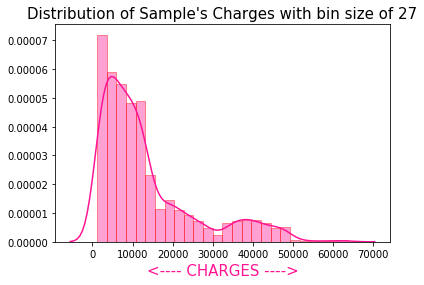

In [13]:
sns.distplot(insurance_data['charges'], hist= True, kde= True,
            bins = int(1338/50), color = "deeppink",
            hist_kws={'edgecolor': 'red'})

plt.title("Distribution of Sample's Charges with bin size of 27", fontsize= 15)
plt.xlabel("<---- CHARGES ---->", fontsize = 15, color = "deeppink")

# 3(f).Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [14]:
insurance_data[['age', 'bmi', 'charges']].skew(axis = 0, skipna = True)

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

# 3(g).Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns'

In [15]:

# check_check_outlier() takes a list as input and returns outliers 
def check_outlier(input_data):
    input_data_σ = np.std(input_data)
    input_data_μ = np.mean(input_data)
    outlier_cut_off = 3*input_data_σ
    
    # As per CLT, 99.7% data should exist in range of (μ ± 3σ)
    # Anything outside (μ ± 3σ) is an outlier
    
    lower_limit = input_data_μ - outlier_cut_off
    upper_limit = input_data_μ + outlier_cut_off
    
    outlier_list = []
    for i in input_data:
        if(i < lower_limit or i > upper_limit):
            outlier_list.append(i)
            
    return outlier_list

print("Outliers for BMI : ",check_outlier(insurance_data['bmi']))
print("Outliers for AGE : ",check_outlier(insurance_data['age']))
print("Outliers for CHARGES :" ,check_outlier(insurance_data['charges']))

Outliers for BMI :  [49.06, 50.38, 52.58, 53.13]
Outliers for AGE :  []
Outliers for CHARGES : [51194.55914, 63770.42801, 58571.074479999996, 55135.402089999996, 52590.82939, 60021.39897, 62592.87309]


# 3(h). Distribution of categorical columns (including children)

Text(0.5, 1.0, ' Distribution w.r.t. Regions')

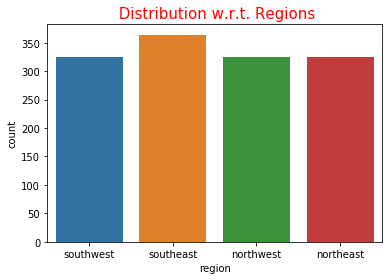

In [16]:
sns.countplot( x = 'region', data = insurance_data)
plt.title(' Distribution w.r.t. Regions', fontsize = 15, color = 'red')

Text(0.5, 1.0, ' Distribution w.r.t. Sex/Gender')

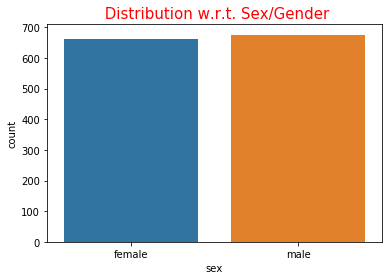

In [17]:
sns.countplot(x = 'sex',  data = insurance_data)
plt.title(' Distribution w.r.t. Sex/Gender', fontsize = 15, color = 'red')

Text(0.5, 1.0, ' Distribution w.r.t. Smoking Habits')

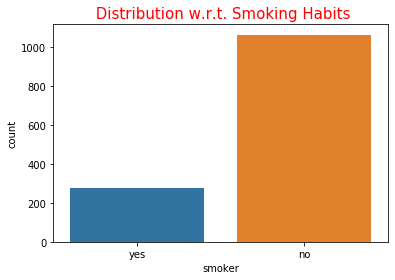

In [18]:
sns.countplot(x = 'smoker',  data = insurance_data)
plt.title(' Distribution w.r.t. Smoking Habits', fontsize = 15, color = 'red')

Text(0.5, 1.0, ' Distribution w.r.t. Number of Childs')

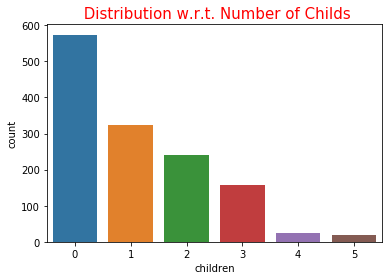

In [19]:
sns.countplot(x = 'children',  data = insurance_data)
plt.title(' Distribution w.r.t. Number of Childs', fontsize = 15, color = 'red')

# 3(h). Pair plot that includes all the columns of the data frame

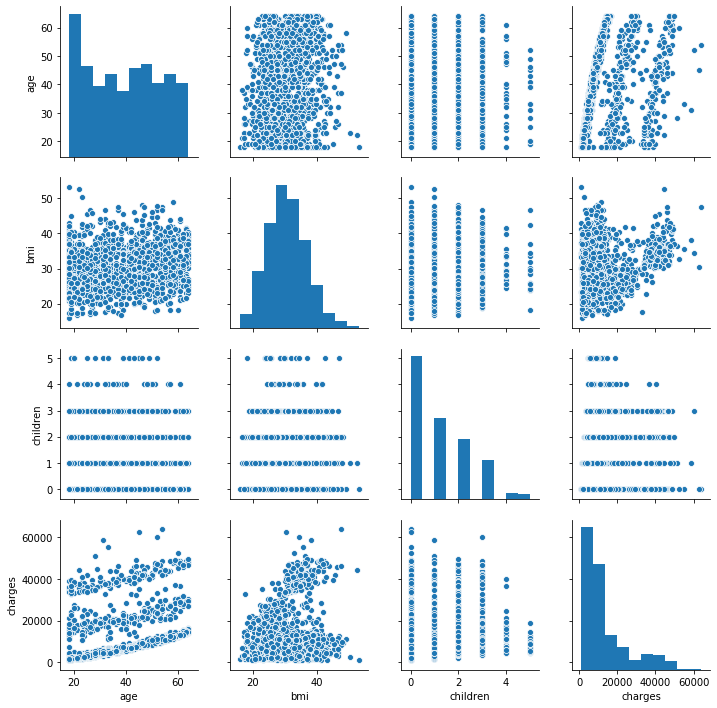

In [20]:
sns.pairplot(insurance_data)

# ======================================================================================


# 4(a). Do charges of people who smoke differ significantly from the people who don't?

### Lets see the difference in visual representation with a Box Plot:

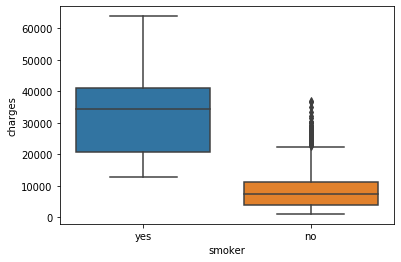

In [21]:
b = sns.boxplot(x = "smoker", y = "charges", data = insurance_data)

#### Above we can see there is a significant difference between Charges Paid by smokers and Non Smokers. Now let's validate this statistically:

### Ho = The Charges of Smokers is Equal to Non Smokers

### Ha = The Charges for Smokers and Non Smokers differ

In [22]:
# Let's extract the charges paid by Smokers and Non Smokers in tow Different variables for comparision

smokers_df = insurance_data[insurance_data['smoker'] == 'yes']
smokers_charges = smokers_df['charges']

nonsmokers_df = insurance_data[insurance_data['smoker'] == 'no']
nonsmokers_charges = nonsmokers_df['charges']

print('The mean of Charges paid by Smokers and Non Smokers are {} and {} respectively'. format(smokers_charges.mean(), nonsmokers_charges.mean()))

The mean of Charges paid by Smokers and Non Smokers are 32050.23183153285 and 8434.268297856199 respectively


### * Numerically Mean for Smokers and Non-smokers are different.

### * We have to find how much charges for both of them are different Statistically. 

### * Let's select α = 0.05

In [23]:
charges_t_statistic,charges_p_value = ttest_ind(smokers_charges,nonsmokers_charges)
print(charges_t_statistic, charges_p_value, "\n")

if(charges_p_value > 0.05):
    print("Accept Ho : There charges are same with a p-value of {}".format(round(charges_p_value,4)))
else:
    print("Reject Ho : There charges differ significantly with a p-value of {}".format(round(charges_p_value,4)))

46.664921172723716 8.271435842177219e-283 

Reject Ho : There charges differ significantly with a p-value of 0.0


# Hence, There is a significant difference in Charges paid by Smokers and Non Smokers

# ======================================================================================

# 4(b). Does bmi of males differ significantly from that of females?

### Lets see the difference in visual representation with a Box Plot:


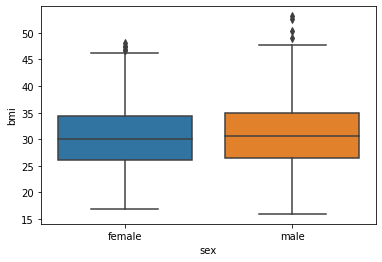

In [24]:
p = sns.boxplot(x = "sex", y = "bmi", data = insurance_data)

#### We can see a slight difference in BMI values here. Now let's validate this statistically:

### Ho = The BMI of Males is Equal to Females

### Ha = The BMI of Males is Not equal to Females

### We Select the Significance level at 5% i.e. 0.05

In [25]:
female_df = insurance_data[insurance_data['sex'] == 'female']
female_bmi = smokers_df['bmi']

male_df = insurance_data[insurance_data['sex'] == 'male']
male_bmi = male_df['bmi']

bmi_t_statistic,bmi_p_value = ttest_ind(female_bmi,male_bmi)
print(bmi_t_statistic, bmi_p_value, "\n")

if(bmi_p_value > 0.05):
    print("Accept Ho : The BMI vales are same with p-value of {}".format(round(bmi_p_value,4)))
else:
    print("Reject Ho : The BMI vales differ significantly with p-value of {}".format(round(bmi_p_value,4)))

-0.52919035604911 0.5967972927368852 

Accept Ho : The BMI vales are same with p-value of 0.5968


# Hence, There is a no significant difference in BMI of Males Vs Females

# ======================================================================================

# 4(c). Is the proportion of smokers significantly different in different genders?

#### We have to find if both these proportions are significantly different or not

#### Since, both Gender(i.e. Male, Female) and Smokers(i.e. Yes, No) both are catagorical values, we Will use:

### Z-Test of Proportions


We want to see if the proportion of smokers in the female population is significantly less than it is in the male population


#### Ho = The proportions are equal
#### Ha = The two proportions are not equal

In [26]:
n_female = insurance_data.sex.value_counts()[1]                                              # Total number of Females
n_male = insurance_data.sex.value_counts()[0]                                                # Total number of Males

smoker_female = insurance_data[insurance_data['sex'] == 'female'].smoker.value_counts()[1]   # Number of Female Smoker
smoker_male = insurance_data[insurance_data['sex'] == 'male'].smoker.value_counts()[1]       # Number of Male Smokers

print('\nProportion of smokers in females, males are {} and {} respectively \n'.format(round(smoker_female/n_female,2),round(smoker_male/n_male,2)))

zstat, p_value = proportions_ztest([smoker_female,smoker_male],[n_female,n_male])

if p_value > 0.05:
    print('Hence, the Proportions of Smokers in Males and Females are equal  with a p-value of {}'.format(round(p_value,4)))
else:
    print('We reject the Null Hypothesis with a p-value of {}, i.e. \nThe Proportions of Smokers in Males and Females are not equal'.format(round(p_value,4)))


Proportion of smokers in females, males are 0.17 and 0.24 respectively 

We reject the Null Hypothesis with a p-value of 0.0053, i.e. 
The Proportions of Smokers in Males and Females are not equal


# Hence, the proportion of smokers significantly different in different genders.

# ======================================================================================

# 4(d). Is the distribution of BMI across women with no children, one child and two children, the same ?



### Let's Extract the Dataframe with only Female Values with None, One or Two Children with their corresponding BMI values.



In [27]:
female_df = insurance_data[insurance_data['sex'] == 'female']

female_0 = female_df[female_df['children'] == 0].loc[:,['children','bmi']]
female_1 = female_df[female_df['children'] == 1].loc[:,['children','bmi']]
female_2 = female_df[female_df['children'] == 2].loc[:,['children','bmi']]

female_bmi = pd.DataFrame()
female_bmi = female_bmi.append(female_0)
female_bmi = female_bmi.append(female_1)
female_bmi = female_bmi.append(female_2)

### Lets explore the data side-by-side visually with a Boxen Plot:

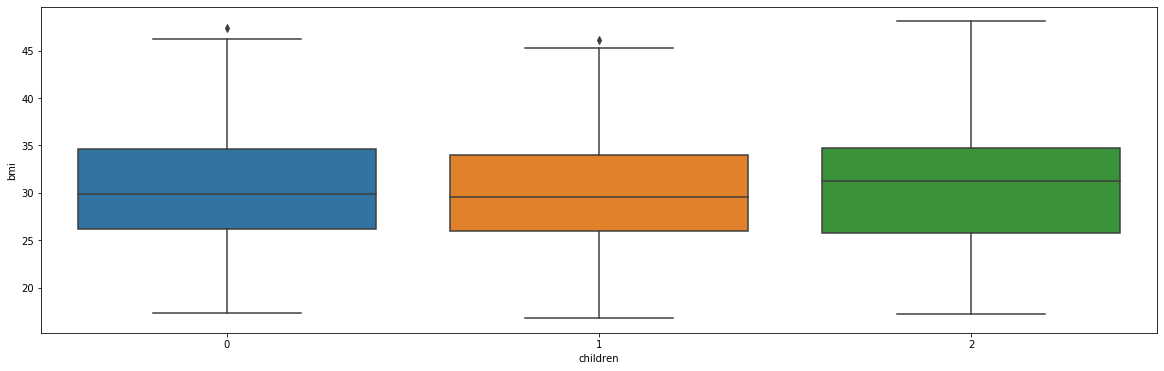

In [28]:
plt.figure(figsize = (20,6))
g = sns.boxplot(x = 'children',  y = 'bmi', data = female_bmi)

### From the Above Graph we can confirm there are difference between bmi of Females with Zero, One or Two Kids. Let's investigate further with ANOVA

#### We can see a slight difference in BMI values here. Now let's validate this statistically:

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 

#### Here we will consider one Independent Catagorical Variables (Childrens = 0 , 1 , 2 as Gender is only consedered to be Female) and One Dependent Continious Variable we will use ANOVA

#### Deciding the significance level as 0.05

### Calculating p value using ANOVA table

In [29]:
mod = ols('bmi ~ C(children)', data = female_bmi).fit()
aov_table = sm.stats.anova_lm(mod, typ = 2)
print(aov_table)

                   sum_sq     df         F    PR(>F)
C(children)     24.590123    2.0  0.334472  0.715858
Residual     20695.661583  563.0       NaN       NaN


## Here, The P-Value is 0.7158 > 0.05, So we can accept the Null Hypothesis i.e. $\mu1$ = $\mu2$ = $\mu3$

# Hence, the distribution of BMI across women with no children, one child and two children are same

# ======================================================================================